# 🕵️ Task 1.2 – Detecting Secret Patterns with Computer Vision  

In this task, we help Sherlock Holmes uncover the **secret communication pattern** of a society that uses **red and blue balls** arranged in public spaces.  

Our objective is to build a **classical computer vision system (no deep learning)** using **OpenCV** that:  
- Detects **all red and blue balls** in different surveillance images.  
- Handles challenges like **different lighting conditions** and **shadows**.  
- Outputs detections in a `.txt` file for each image, with one of the following formats:  

1. **Bounding box format:**  
```

\<class\_id> \<x\_center> \<y\_center> <width> <height>

```
2. **Circle format:**  
```

\<class\_id> \<x\_center> \<y\_center> <radius>

```

Where:  
- `class_id = 0` → Blue ball  
- `class_id = 1` → Red ball  

Finally, our system will produce a **labels folder** containing the `.txt` files corresponding to each image, which can then be used to decode the society’s secret instructions.  

---
```

---



In [294]:
import sys, os

# add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Get project root automatically (folder above src)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
image_folder = os.path.join(project_root, "data", "images")

print("Looking in:", image_folder)
print("Files found:", os.listdir(image_folder)[:5])
import importlib
import src.functions

importlib.reload(src.functions)
# all logic required is defined in src folder
from src.functions import ImageProcess
processor = ImageProcess()

Looking in: e:\MIA_AI\Sherlock_AI\Sherlock-AI\phase1-task1.2-ball-detection\data\images
Files found: ['ball_1.jpg', 'ball_10.jpg', 'ball_11.jpg', 'ball_12.jpg', 'ball_13.jpg']
Processor initialized


### loading the pictures

In [295]:

# Get list of image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

images_array = processor.load_image(image_files,image_folder)

Loaded: ball_1.jpg - Shape: (1920, 1080, 3)
Loaded: ball_10.jpg - Shape: (1836, 3264, 3)
Loaded: ball_11.jpg - Shape: (1836, 3264, 3)
Loaded: ball_12.jpg - Shape: (960, 443, 3)
Loaded: ball_13.jpg - Shape: (3264, 1836, 3)
Loaded: ball_14.jpg - Shape: (960, 443, 3)
Loaded: ball_15.jpg - Shape: (960, 443, 3)
Loaded: ball_16.jpg - Shape: (960, 443, 3)
Loaded: ball_17.jpg - Shape: (960, 443, 3)
Loaded: ball_18.jpg - Shape: (3264, 1836, 3)
Loaded: ball_19.jpg - Shape: (3264, 1836, 3)
Loaded: ball_2.jpg - Shape: (3264, 1836, 3)
Loaded: ball_20.jpg - Shape: (3264, 1836, 3)
Loaded: ball_3.jpg - Shape: (960, 443, 3)
Loaded: ball_4.jpg - Shape: (960, 443, 3)
Loaded: ball_5.jpg - Shape: (960, 443, 3)
Loaded: ball_6.jpg - Shape: (960, 443, 3)
Loaded: ball_7.jpg - Shape: (443, 960, 3)
Loaded: ball_8.jpg - Shape: (1920, 1080, 3)
Loaded: ball_9.jpg - Shape: (1920, 1080, 3)


### Showing images

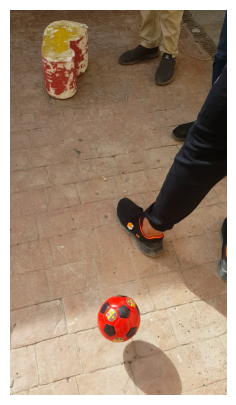

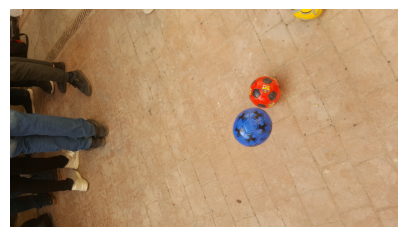

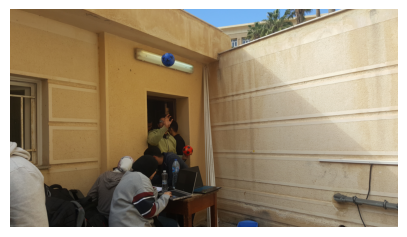

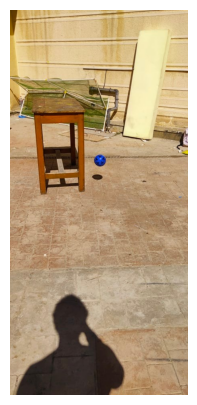

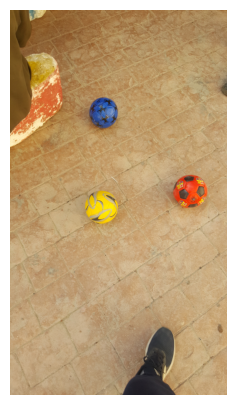

In [296]:
processor.show_images(images_array,5)

### Masking

Red masked images


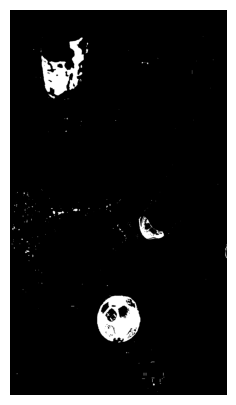

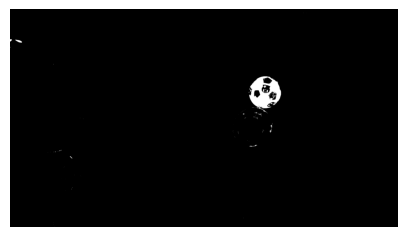

Blue masked images


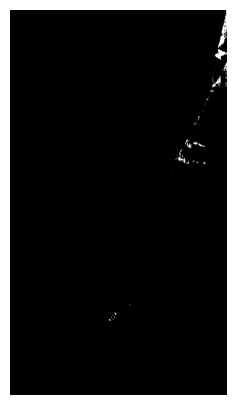

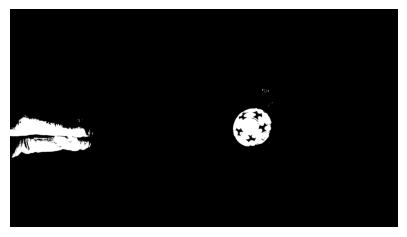

In [297]:
red_masks,blue_masks = processor.red_blue_mask(images_array,len(images_array))
print("Red masked images")
processor.show_images(red_masks,2)
print("Blue masked images")
processor.show_images(blue_masks,2)

### Applying Morphological Opening 
##### to reduct noise and enhance object detection 

Red masked cleaned images


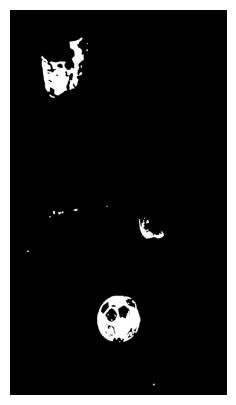

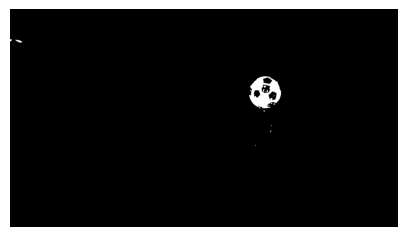

Blue masked cleaned images


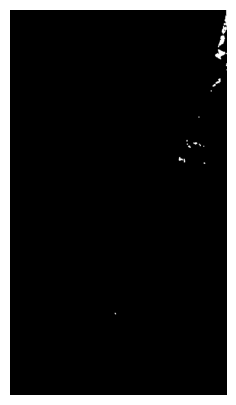

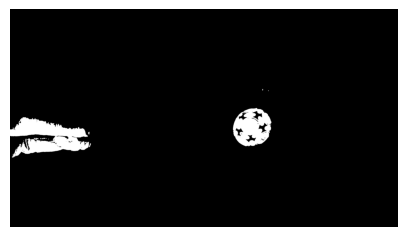

In [298]:
import numpy as np
kernel = np.ones((5,5), np.uint8)
clean_red_masks = processor.apply_opening_morph(red_masks,len(red_masks),kernel)
clean_blue_masks = processor.apply_opening_morph(blue_masks,len(blue_masks),kernel)

print("Red masked cleaned images")
processor.show_images(clean_red_masks,2)
print("Blue masked cleaned images")
processor.show_images(clean_blue_masks,2)

### Detection using Hough Circle

In [299]:
detections_per_image = []
images_array_copy = images_array.copy()
for red_mask, blue_mask, img in zip(clean_red_masks, clean_blue_masks, images_array_copy):
    reds = processor.detect_circles(red_mask, 1, img)
    blues = processor.detect_circles(blue_mask, 0, img)
    detections_per_image.append(reds + blues)

detections_per_image[:4]   

[[(1, np.uint16(546), np.uint16(1556), np.uint16(98))],
 [(1, np.uint16(2158), np.uint16(674), np.uint16(33)),
  (0, np.uint16(2022), np.uint16(990), np.uint16(84))],
 [(0, np.uint16(1330), np.uint16(428), np.uint16(57))],
 []]

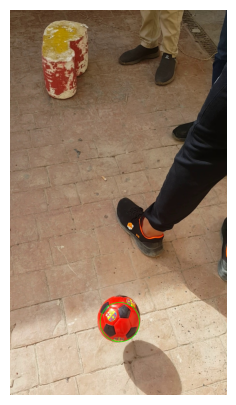

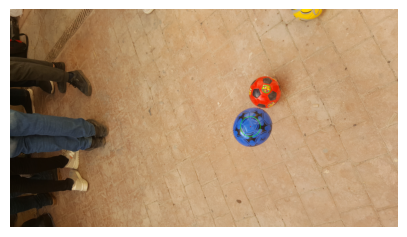

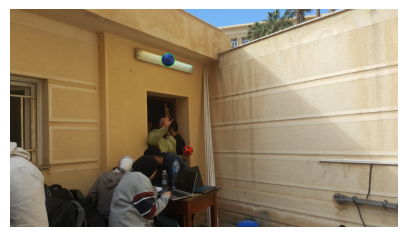

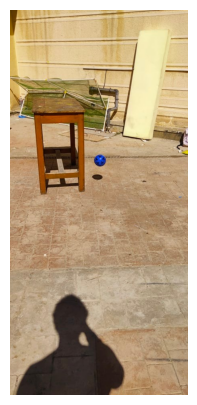

In [300]:
processor.show_images(images_array,4)

### Saving the results

In [301]:
detections_folder = os.path.join(project_root, "data", "detections")
processor.save_all_detections(image_folder,detections_per_image,detections_folder)